In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

## Functions

In [36]:
def modelpokemon(name):
    train_ds, val_ds, test_ds = getds(name)
        
    num_classes = len(train_ds.class_names)
    
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    model = Sequential([
      layers.Rescaling(1./255, input_shape=(128, 128, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(num_classes)
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=100
    )
    
    return train_ds, val_ds, test_ds, model, history   
    
def getds(name):
    batch_size = 32
    img_height = 128
    img_width = 128
    
    data_path = os.getcwd() + '\\PokeImages-by-type\\' + name
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="training",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="validation",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    # https://errorsfixing.com/is-it-possible-to-split-a-tensorflow-dataset-into-train-validation-and-test-datasets-when-using-image_dataset_from_directory/
    split = round(len(val_ds) / 1.5)
    test_ds = val_ds.take(split)
    val_ds = val_ds.skip(split)
    
    return train_ds, val_ds, test_ds
    
def graphmodel(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(history.params['epochs'])

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Loop to Generate Model for Each Type

In [1]:
typelist = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 
            'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [27]:
icetrain_ds, iceval_ds, icetest_ds, icemodel, icehistory = modelpokemon('Ice')

Found 950 files belonging to 23 classes.
Using 665 files for training.
Found 950 files belonging to 23 classes.
Using 285 files for validation.
Epoch 1/100
21/21 [==============================] - 8s 30ms/step - loss: 3.0258 - accuracy: 0.1173 - val_loss: 2.7422 - val_accuracy: 0.3548
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 2.4886 - accuracy: 0.2526 - val_loss: 2.1506 - val_accuracy: 0.5376
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 1.7327 - accuracy: 0.4797 - val_loss: 1.3363 - val_accuracy: 0.6667
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 1.1231 - accuracy: 0.6617 - val_loss: 0.8246 - val_accuracy: 0.8280
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7835 - val_loss: 0.5774 - val_accuracy: 0.8817
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 0.4563 - accuracy: 0.8496 - val_loss: 0.3260 - val_accuracy: 0.9247
Epoch 

21/21 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.2124 - val_accuracy: 0.9570
Epoch 58/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9895 - val_loss: 0.2179 - val_accuracy: 0.9462
Epoch 59/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.1672 - val_accuracy: 0.9462
Epoch 60/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.2292 - val_accuracy: 0.9462
Epoch 61/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.1904 - val_accuracy: 0.9462
Epoch 62/100
21/21 [==============================] - 0s 10ms/step - loss: 0.0189 - accuracy: 0.9955 - val_loss: 0.2453 - val_accuracy: 0.9570
Epoch 63/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.9910 - val_loss: 0.1868 - val_accuracy: 0.9570
Epoch 64/100
21/21

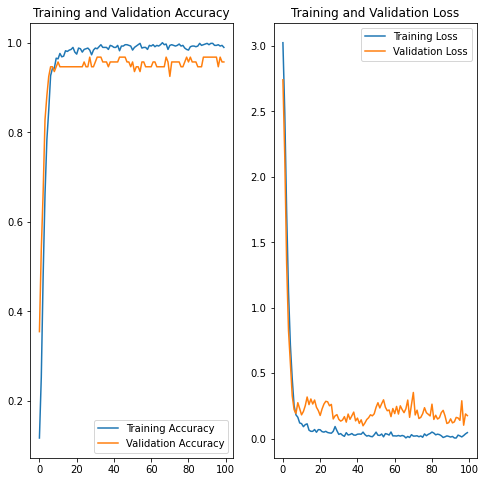

In [37]:
graphmodel(icehistory)

In [40]:
icemodel.evaluate(icetest_ds)

TypeError: 'TakeDataset' object is not subscriptable

In [45]:
vartracker = []

for poketype in typelist[:2]:
    train = poketype + "_train_ds"
    val = poketype + "_val_ds"
    test = poketype + "_test_ds"
    model = poketype + "_model"
    history = poketype + "_history"
    varlist = [train, val, test, model, history]
    vartracker.append(varlist)
    vars()[train], vars()[val], vars()[test], vars()[model], vars()[history]= modelpokemon(poketype)

Found 3062 files belonging to 72 classes.
Using 2144 files for training.
Found 3062 files belonging to 72 classes.
Using 918 files for validation.
Epoch 1/100
67/67 [==============================] - 2s 16ms/step - loss: 4.0152 - accuracy: 0.0779 - val_loss: 3.5160 - val_accuracy: 0.2548
Epoch 2/100
67/67 [==============================] - 1s 9ms/step - loss: 2.7904 - accuracy: 0.3549 - val_loss: 1.9685 - val_accuracy: 0.5968
Epoch 3/100
67/67 [==============================] - 1s 10ms/step - loss: 1.5507 - accuracy: 0.6175 - val_loss: 1.1843 - val_accuracy: 0.7677
Epoch 4/100
67/67 [==============================] - 1s 9ms/step - loss: 0.9606 - accuracy: 0.7425 - val_loss: 0.9253 - val_accuracy: 0.8258
Epoch 5/100
67/67 [==============================] - 1s 9ms/step - loss: 0.7013 - accuracy: 0.8032 - val_loss: 0.7121 - val_accuracy: 0.8903
Epoch 6/100
67/67 [==============================] - 1s 9ms/step - loss: 0.4893 - accuracy: 0.8633 - val_loss: 0.7779 - val_accuracy: 0.8903
Epoch

Epoch 58/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.9484 - val_accuracy: 0.9032
Epoch 59/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.9181 - val_accuracy: 0.8903
Epoch 60/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0387 - accuracy: 0.9869 - val_loss: 1.0142 - val_accuracy: 0.8903
Epoch 61/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0414 - accuracy: 0.9888 - val_loss: 0.7856 - val_accuracy: 0.9032
Epoch 62/100
67/67 [==============================] - 1s 11ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.9625 - val_accuracy: 0.9000
Epoch 63/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0465 - accuracy: 0.9841 - val_loss: 0.8186 - val_accuracy: 0.9065
Epoch 64/100
67/67 [==============================] - 1s 10ms/step - loss: 0.0436 - accuracy: 0.9888 - val_loss: 0.7150 - val_accuracy: 0.9097

23/23 [==============================] - 0s 9ms/step - loss: 0.0923 - accuracy: 0.9672 - val_loss: 0.4957 - val_accuracy: 0.8989
Epoch 15/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1110 - accuracy: 0.9631 - val_loss: 0.4255 - val_accuracy: 0.8989
Epoch 16/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.4763 - val_accuracy: 0.8876
Epoch 17/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0804 - accuracy: 0.9768 - val_loss: 0.4158 - val_accuracy: 0.9326
Epoch 18/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0789 - accuracy: 0.9781 - val_loss: 0.5249 - val_accuracy: 0.8876
Epoch 19/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.4896 - val_accuracy: 0.9213
Epoch 20/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0487 - accuracy: 0.9822 - val_loss: 0.4372 - val_accuracy: 0.8989
Epoch 21/100
23/23 

Epoch 72/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.4834 - val_accuracy: 0.9213
Epoch 73/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.9945 - val_loss: 0.5203 - val_accuracy: 0.9213
Epoch 74/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.9973 - val_loss: 0.5877 - val_accuracy: 0.9213
Epoch 75/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.5476 - val_accuracy: 0.9326
Epoch 76/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.9932 - val_loss: 0.6246 - val_accuracy: 0.9101
Epoch 77/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.4692 - val_accuracy: 0.9438
Epoch 78/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9891 - val_loss: 0.5820 - val_accuracy: 0.9213
Epoch 

In [42]:
varlist

['Dark_train_ds', 'Dark_val_ds', 'Dark_test_ds', 'Dark_model', 'Dark_history']

{'verbose': 1, 'epochs': 100, 'steps': 23}